# Intro

The following instructions teach you how to calculate density of roads. This is a variable of interest in social sciences and is frequently used as a proxy for economic development or for state penetration. In order to calculate road density, one needs to follow a couple of steps. Roads are polylines while districts are polygons. You can extend this analysis to other polylines and polygons.

In this tutorial, we will be looking at density of roads by district in Albania.

## Data sources

The administrative districts called "ALB_admx"
- www.gadm.org

Road data was extracted on 5/9/2017 from:
- www.openstreetmap.org

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [122]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Define your working directory

In [29]:
path = "C:\\Users\\bgpopescu\\Dropbox\\Albania project\\Data\\Roads\\"

The basic files that we will work with are the following:

- Original_euro_raster.gdb
- Original_ALB_adm.gdb
- Original_Roads.gdb

# Import ArcGIS Library

In [30]:
# Import system modules
import sys, string, os, arcgisscripting
from IPython.display import Image

# Create the Geoprocessor object
gp = arcgisscripting.create()
print "created geoprocessor object"

# Check out any necessary licenses
gp.CheckOutExtension("spatial")
gp.CheckOutExtension("3D")
print "checked extensions"

#Turn overwrite on
gp.overwriteoutput = 1
print "overwrite on"

# Set Extent
gp.Extent = "MAXOF"

created geoprocessor object
checked extensions
overwrite on


# Examine Original geodatabases (optional)

These are are the geodatabases that I manually created and that contain the original files.
These geodatabases are:

- Original_euro_raster.gdb
- Original_ALB_adm.gdb
- Original_Roads.gdb

## Original_euro_raster.gdb

In [3]:
arcpy.env.workspace = path + "Original_euro_raster.gdb"
fds=arcpy.ListDatasets()
for fd in fds:
    print fd

euro_raster


We will now visulize the raster.
Create a blank mxd file manually from ArcGIS, called "tutorial" in your working directory. In this case it is in ...Roads/Tutorial.

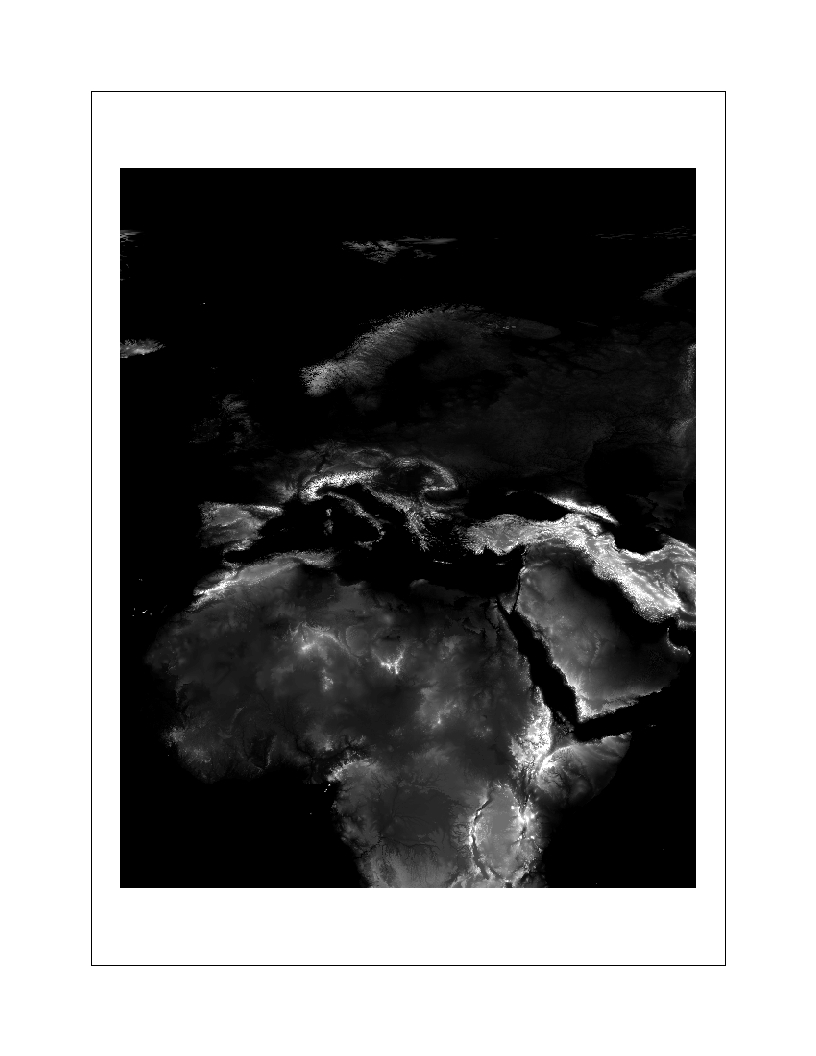

In [4]:
mxdPath = path + "Tutorial\\tutorial.mxd"
filePath = path + "Original_euro_raster.gdb\\euro_raster"
fileLayerName = 'euro_raster1'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeRasterLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\euro_raster")
Image(path + "Tutorial\\pics\\euro_raster.jpg")

## Original_ALB_adm.gdb

In [4]:
arcpy.env.workspace =  path +"Original_ALB_adm.gdb"
fds=arcpy.ListFeatureClasses()
for fd in fds:
    print fd

ALB_adm3
ALB_adm0
ALB_adm2
ALB_adm1


We will now visulize the shapefiles. The following picture display the Peruvian districts in 1975.

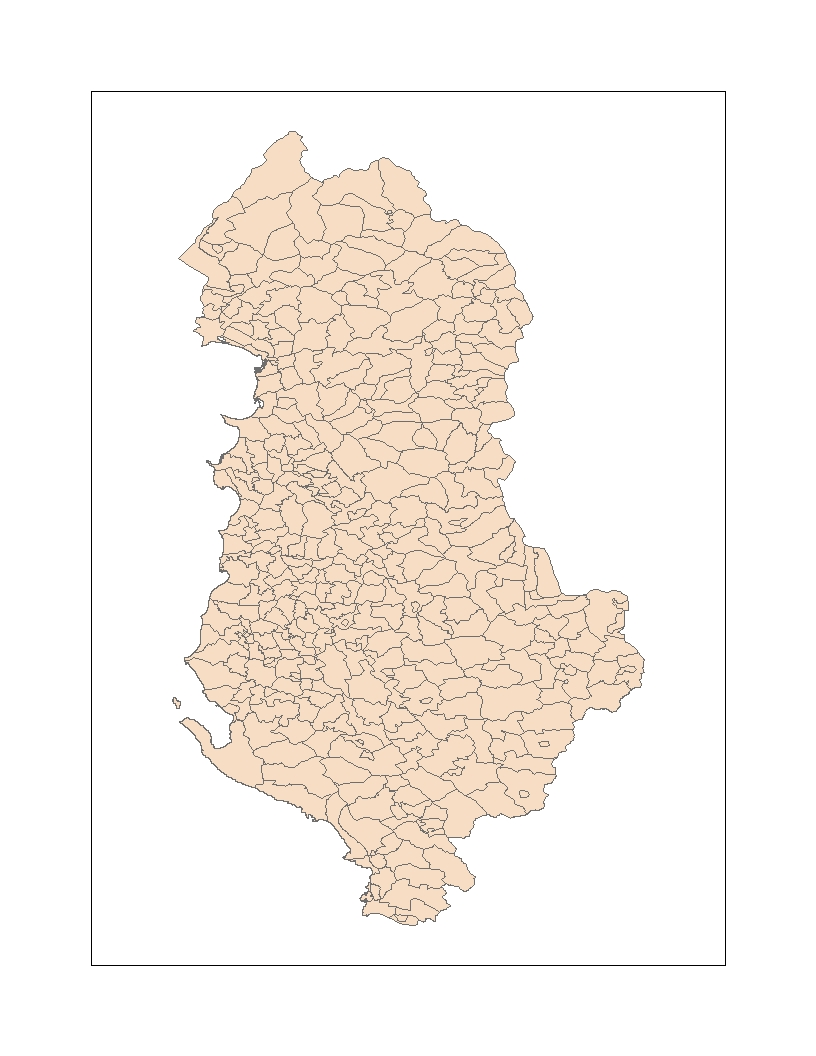

In [7]:
mxdPath = path + "Tutorial\\tutorial.mxd"
filePath = path + "Original_ALB_adm.gdb\\ALB_adm3"
fileLayerName = 'ALB_adm3'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\ALB_adm3")
Image(path + "Tutorial\\pics\\ALB_adm3.jpg")

 The following picture displays the Albania shape file.

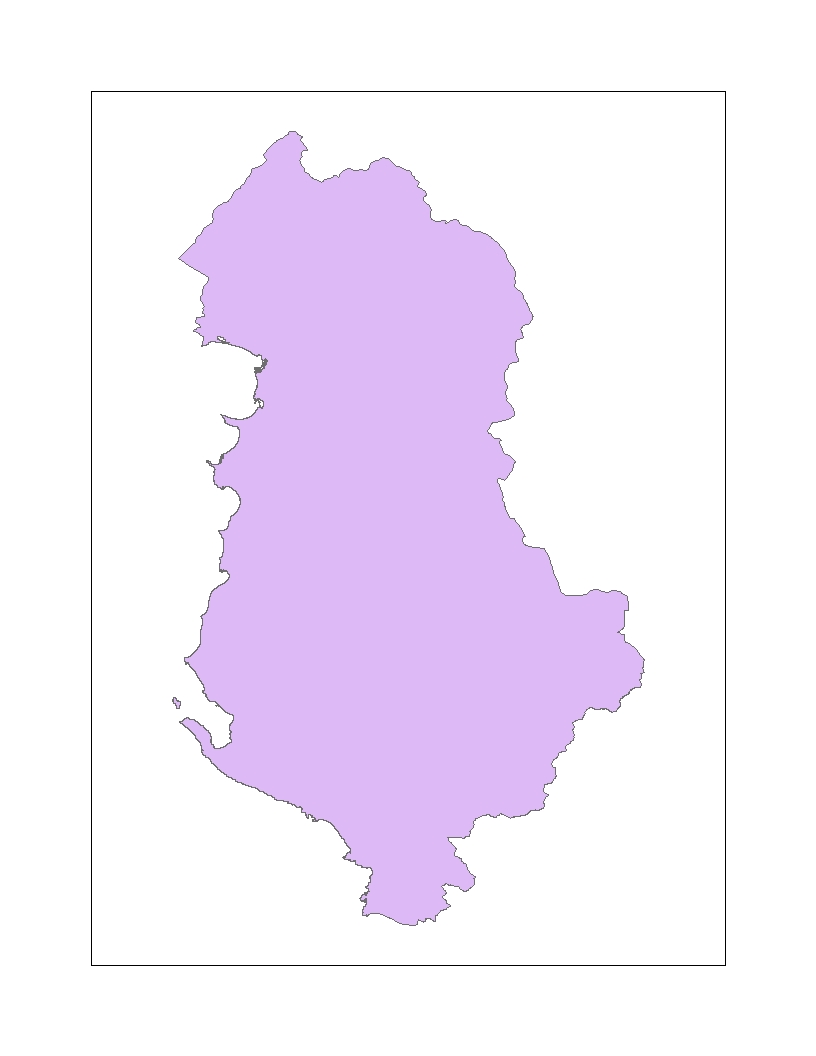

In [9]:
mxdPath = path + "Tutorial\\tutorial.mxd"
filePath = path + "Original_ALB_adm.gdb\\ALB_adm0"
fileLayerName = 'ALB_adm0'
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\ALB_adm0")
Image(path + "Tutorial\\pics\\ALB_adm0.jpg")

## Original_Roads.gdb

We will now map the a type of road - road motorway.
We will first set the working directory.

In [5]:
arcpy.env.workspace =  path +"Original_Roads.gdb"

The following command allows us to see what is inside the geodabase.

In [6]:
fds=arcpy.ListFeatureClasses()
for fd in fds:
    print fd

road_motorway
road_primary
road_residential
road_secondary
road_tertiary
road_track
road_trunk
rail_line


The following commands allow us to map out one element from the original database.

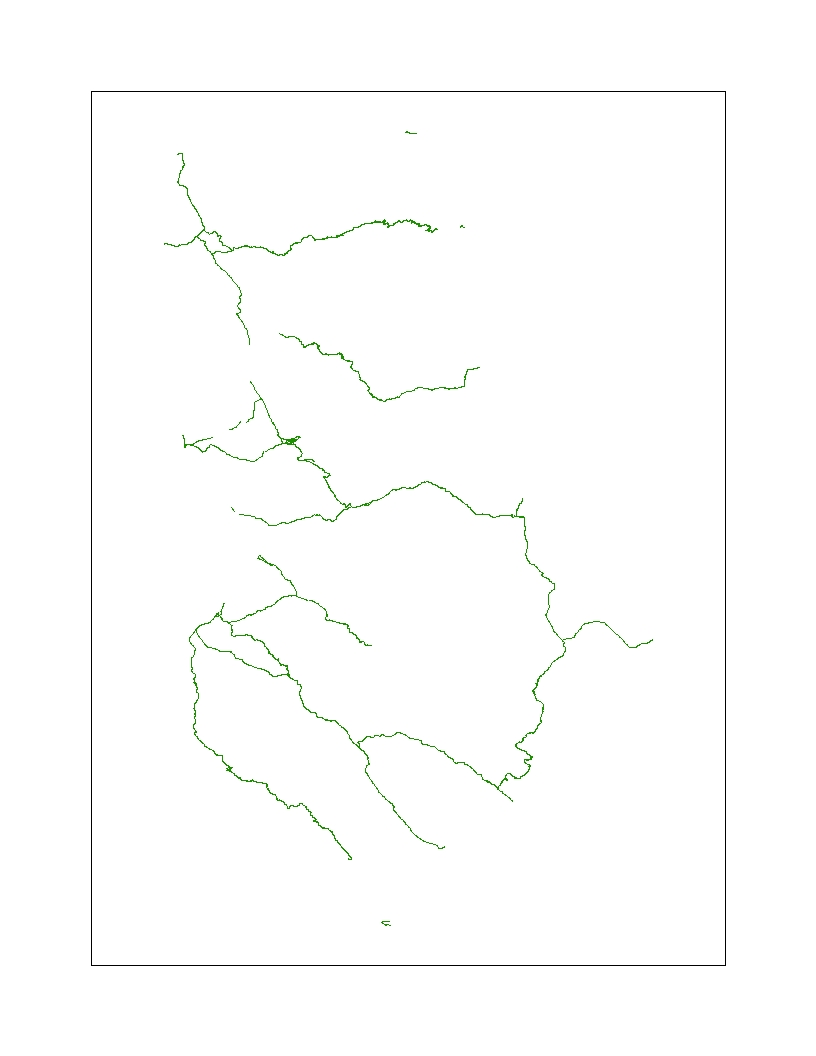

In [12]:
filePath = path + "Original_Roads.gdb\\road_motorway"
filePath2 = path + "Original_Roads.gdb\\road_primary"
fileLayerName = 'ALB_adm0'
mxdPath = path + "Tutorial\\tutorial.mxd"
md = arcpy.mapping.MapDocument(mxdPath)
result = arcpy.MakeFeatureLayer_management(filePath, fileLayerName)
result2 = arcpy.MakeFeatureLayer_management(filePath2, fileLayerName)
layer = result.getOutput(0)
layer2 = result2.getOutput(0)
df = arcpy.mapping.ListDataFrames(md)[0]
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.mapping.AddLayer(df, layer2, 'AUTO_ARRANGE')
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\road_motorway")
Image(path + "Tutorial\\pics\\road_motorway.jpg")

The following set of commands allow us to automatically put several shape file within the same map.

In [93]:
mxd = arcpy.mapping.MapDocument(path + "Tutorial\\tutorial.mxd")

In [94]:
dataFrame = arcpy.mapping.ListDataFrames(mxd, "*")[0]

In [100]:
shp_List=arcpy.ListFeatureClasses()
for shp in shp_List:
    print shp

In [96]:
# Local variables:
Tutorial =path + "Tutorial"
base_Folder = Tutorial

# Process: Create Folder
arcpy.CreateFolder_management(Tutorial, "pics_Roads")
print "Folder created"

Folder created


In [97]:
base_Folder = path + "Tutorial\\base_Folder"

In [98]:
for layer in shp_List:
    outlayer = layer + "_lyr"
    layerfile = os.path.join(base_Folder, layer + ".lyr")
    arcpy.MakeFeatureLayer_management(layer, outlayer)
    arcpy.SaveToLayerFile_management(outlayer, layerfile, "ABSOLUTE")
    addlayer = arcpy.mapping.Layer(layerfile)
    arcpy.mapping.AddLayer(dataFrame, addlayer, "BOTTOM")
    #The following commands are responsible for the zoom of the map
    #You may have to comment the following 4 lines out when running the first time.
    #Otherwise, it will give you an error.
    df = arcpy.mapping.ListDataFrames(mxd)[0]
    lyr = arcpy.mapping.ListLayers(mxd, 'road_track*', df)[0]
    ext = lyr.getExtent()
    df.extent = ext
    arcpy.RefreshActiveView()
    
    arcpy.mapping.ExportToJPEG(mxd, path + "Tutorial\\pics\\roads")

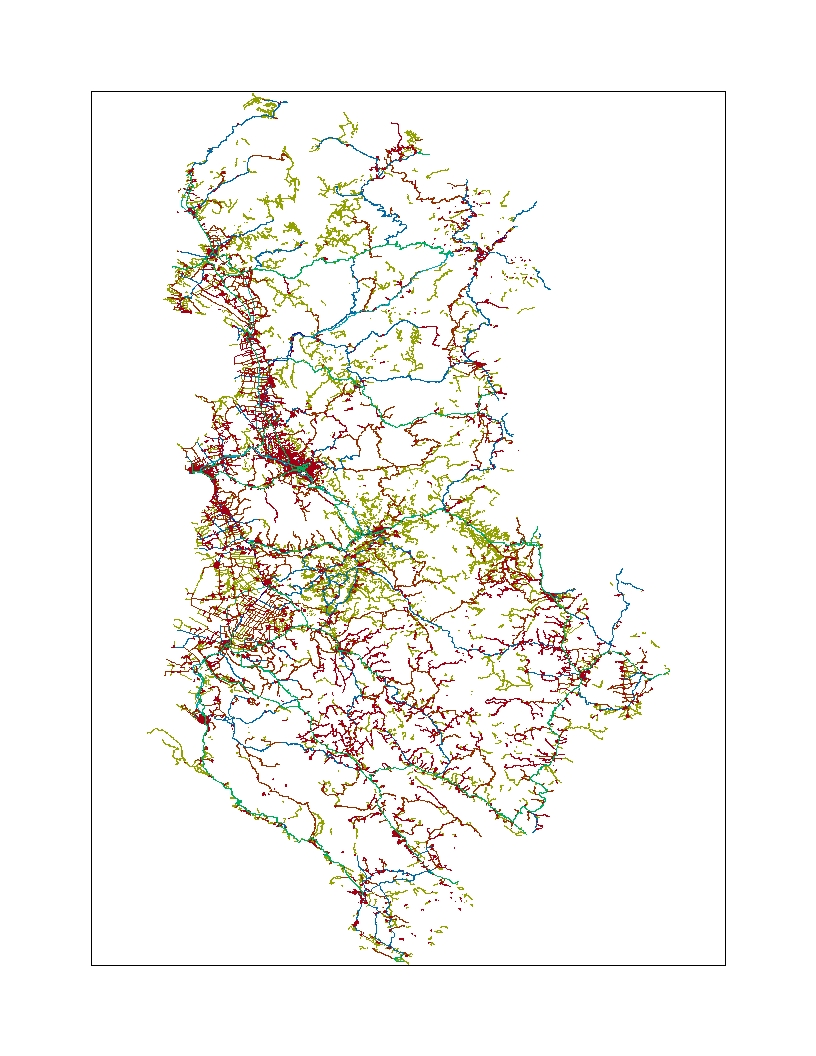

In [99]:
Image(path + "Tutorial\\pics\\roads.jpg")

# Processing

## Process: Create File GDB

In [21]:
Roads = path
Roads_gdb = Roads
arcpy.CreateFileGDB_management(Roads, "Roads.gdb", "CURRENT")
print "Geodatabse created"

Geodatabse created


## Project shape files to WGS_1984_UTM_Zone_34N

In [40]:
ALB_adm0 = path + "Original_ALB_adm.gdb\\ALB_adm0"
ALB_adm0__2_ = path + "Roads.gdb\\ALB_adm0"
ALB_adm1 = path + "Original_ALB_adm.gdb\\ALB_adm1"
ALB_adm1__2_ = path + "Roads.gdb\\ALB_adm1"
ALB_adm2 = path + "Original_ALB_adm.gdb\\ALB_adm2"
ALB_adm2__2_ = path + "Roads.gdb\\ALB_adm2"
ALB_adm3 = path + "Original_ALB_adm.gdb\\ALB_adm3"
ALB_adm3__2_ = path + "Roads.gdb\\ALB_adm3"

road_motorway = path + "Original_Roads.gdb\\road_motorway"
road_motorway__2_ = path + "Roads.gdb\\road_motorway"
road_primary = path + "Original_Roads.gdb\\road_primary"
road_primary__2_ = path + "Roads.gdb\\road_primary"
road_residential = path + "Original_Roads.gdb\\road_residential"
road_residential__2_ = path + "Roads.gdb\\road_residential"
road_secondary = path + "Original_Roads.gdb\\road_secondary"
road_secondary__2_ = path + "Roads.gdb\\road_secondary"
road_tertiary = path + "Original_Roads.gdb\\road_tertiary"
road_tertiary__2_ = path + "Roads.gdb\\road_tertiary"
road_track = path + "Original_Roads.gdb\\road_track"
road_track__2_ = path + "Roads.gdb\\road_track"
road_trunk = path + "Original_Roads.gdb\\road_trunk"
road_trunk__2_ = path + "Roads.gdb\\road_trunk"
rail_line = path + "Original_Roads.gdb\\rail_line"
rail_line__2_ = path + "Roads.gdb\\rail_line"


arcpy.Project_management(ALB_adm0, ALB_adm0__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(ALB_adm1, ALB_adm1__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(ALB_adm2, ALB_adm2__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(ALB_adm3, ALB_adm3__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")

arcpy.Project_management(road_motorway, road_motorway__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(road_primary, road_primary__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(road_residential, road_residential__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(road_secondary, road_secondary__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(road_tertiary, road_tertiary__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(road_track, road_track__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(road_trunk, road_trunk__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(rail_line, rail_line__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")


print "Projected shape files to WGS_1984_UTM_Zone_34N"

Projected shape files to WGS_1984_UTM_Zone_34N


## Project elevation to WGS_1984_UTM_Zone_34N"

In [23]:
# Process: Project Raster
euro_raster = path + "Original_euro_raster.gdb\\euro_raster"
euro_raster__2_ = path + "Roads.gdb\\euro_raster"
arcpy.env.workspace = euro_raster
arcpy.ProjectRaster_management(euro_raster, euro_raster__2_, "PROJCS['WGS_1984_UTM_Zone_34N',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',21.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "NEAREST", "983.817852043201 983.817852043201", "", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]")
print "Process: Project Raster"

Process: Project Raster


## Extracting by mask elevation

In [24]:
##Extracting by mask elevation
euro_raster__2_ = path + "Roads.gdb\\euro_raster"
ALB_adm0__2_ = path + "Roads.gdb\\ALB_adm0"
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"
arcpy.gp.ExtractByMask_sa(euro_raster__2_, ALB_adm0__2_, euro_raster_ALB)
print "Extracted rasters to the shape of the country"

Extracted rasters to the shape of the country


Visualizing the new mask

In [25]:
filePath = path + "Roads.gdb\\euro_raster_ALB"
fileLayerName = 'euro_raster_ALB'
result = arcpy.MakeRasterLayer_management(filePath, fileLayerName)
layer = result.getOutput(0)

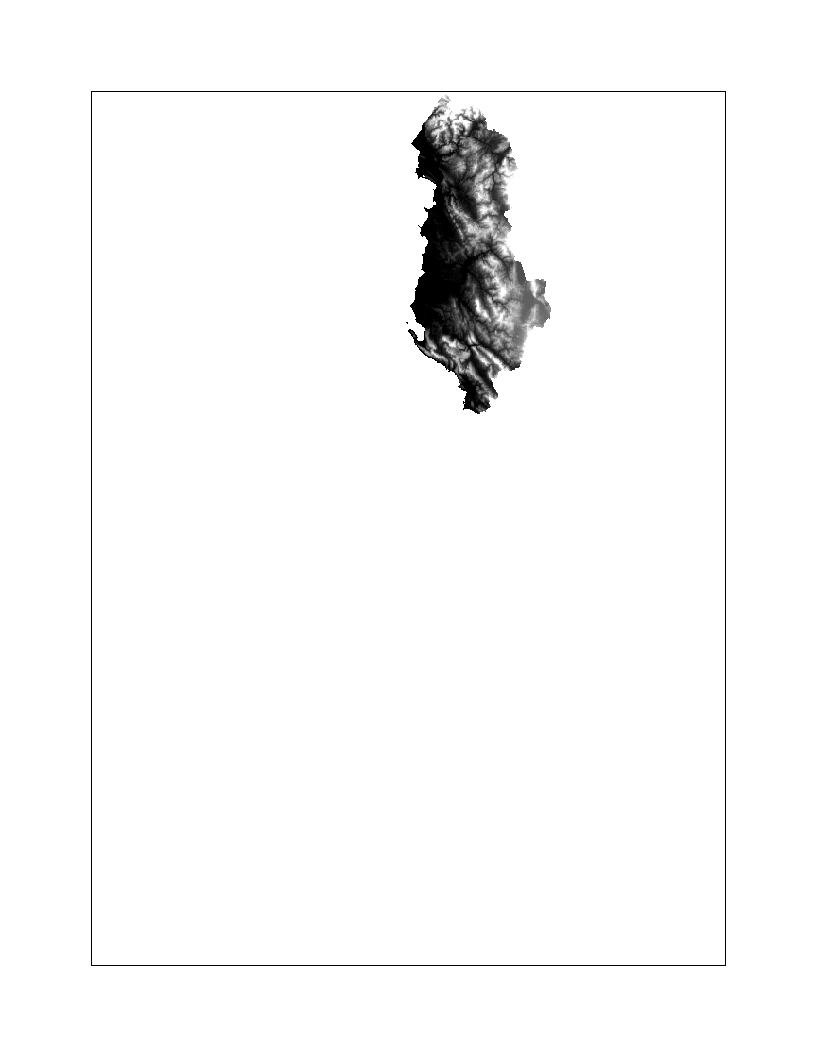

In [26]:
mxdPath = path + "Tutorial\\tutorial.mxd"
md = arcpy.mapping.MapDocument(mxdPath)
df = arcpy.mapping.ListDataFrames(md)[0]
arcpy.mapping.AddLayer(df, layer, 'AUTO_ARRANGE')
arcpy.RefreshActiveView()
arcpy.RefreshTOC()
df.scale = 4000000 # we set the scale to 1:20,000 

#df.extent = layer.getSelectedExtent()
arcpy.mapping.ExportToJPEG(md, path + "Tutorial\\pics\\euro_raster_ALB",  "PAGE_LAYOUT")
Image(path + "Tutorial\\pics\\euro_raster_ALB.jpg")

# Calculating Roads Motorway (highway)

## Adding Unique District ID

In [41]:
ALB_adm3= path + "Roads.gdb\\ALB_adm3"

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "ID", "LONG", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")
print "Added Field to the District Shape file"

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3, "ID", "autoIncrement()", "PYTHON_9.3", "rec=0 \\ndef autoIncrement(): \\n global rec \\n pStart = 1  \\n pInterval = 1 \\n if (rec == 0):  \\n  rec = pStart  \\n else:  \\n  rec += pInterval  \\n return rec")
print "Added Incremental ID to District Shape file"

Added Field to the District Shape file
Added Incremental ID to District Shape file


## Clip roads by districts

In [42]:
#Clip roads by districts
road_motorwaya = path + "Roads.gdb\\road_motorway"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_motorway2 = "'" + road_motorwaya + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_motorway2 + " #;" + ALB_adm3b2 + " #" 

road_motorway_intersect = path + "Roads.gdb\\road_motorway_intersect"

arcpy.Intersect_analysis(ab, road_motorway_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

Intersect_analysis complete


## Add surface information

In [43]:
# Local variables:
road_motorway_intersect = path + "Roads.gdb\\road_motorway_intersect"
road_motorway_intersect__2_ = road_motorway_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_motorway_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"

AddSurfaceInformation_3d complete


## Renaming the SLength field into the relevant variable name

In [44]:
# Local variables:
road_motorway_intersect__3_=road_motorway_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_motorway_intersect__3_, "SLength", "road_motorway", "", "DOUBLE", "8", "NULLABLE", "false")
print "#Calculated length of in meters of Road motoway (highway)"

#Calculated length of in meters of Road motoway (highway)


## Joining length of in meters of Road motoway to the District shape file

In [47]:
# Process: Join Field
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_motorway_intersect = path + "Roads.gdb\\road_motorway_intersect"
arcpy.JoinField_management(ALB_adm3, "ID", road_motorway_intersect, "ID", "road_motorway")
print "Joined length to district shape file"

Joined length to district shape file


## Calculating area of districts taking elevation into consideration

In [48]:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
euro_raster_ALB = path + "\\Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
# The area variable will be called "SArea". Units are sq meters.
arcpy.AddSurfaceInformation_3d(ALB_adm3, euro_raster_ALB, "SURFACE_AREA", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d"

AddSurfaceInformation_3d


## Density of Roads motoways (highway)

In [50]:
#Density road_motorway
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_motorway", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_motorway", "[road_motorway]/ [SArea]", "VB", "")
print "Density road motorway"

Density road motorway


We can now automatize the process for the othe polylines that we have in the geodatabase.

# Step 5: Other types of roads

## Primary Roads

In [52]:
#1. Clip roads by districts
road_primarya = path + "Roads.gdb\\road_primary"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_primary2 = "'" + road_primarya + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_primary2 + " #;" + ALB_adm3b2 + " #" 

road_primary_intersect = path + "Roads.gdb\\road_primary_intersect"

arcpy.Intersect_analysis(ab, road_primary_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
road_primary_intersect = path + "Roads.gdb\\road_primary_intersect"
road_primary_intersect__2_ = road_primary_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_primary_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
road_primary_intersect__3_=road_primary_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_primary_intersect__3_, "SLength", "road_primary", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_primary_intersect = path + "Roads.gdb\\road_primary_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", road_primary_intersect, "ID", "road_primary")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density road_primary
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_primary", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_primary", "[road_primary]/ [SArea]", "VB", "")
print "Density road_primary"

Intersect_analysis complete
AddSurfaceInformation_3d complete
#Calculated length of in meters
Joined length to district shape file
Density road motorway


## Residential Roads

In [53]:
#1. Clip roads by districts
road_residentiala = path + "Roads.gdb\\road_residential"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_residential2 = "'" + road_residentiala + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_residential2 + " #;" + ALB_adm3b2 + " #" 

road_residential_intersect = path + "Roads.gdb\\road_residential_intersect"

arcpy.Intersect_analysis(ab, road_residential_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
road_residential_intersect = path + "Roads.gdb\\road_residential_intersect"
road_residential_intersect__2_ = road_residential_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_residential_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
road_residential_intersect__3_=road_residential_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_residential_intersect__3_, "SLength", "road_residential", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_residential_intersect = path + "Roads.gdb\\road_residential_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", road_residential_intersect, "ID", "road_residential")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density road_residential
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_residential", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_residential", "[road_residential]/ [SArea]", "VB", "")
print "Density road_residential"

Intersect_analysis complete
AddSurfaceInformation_3d complete
Calculated length of in meters
Joined length to district shape file
Density road_residential


## Secondary Roads

In [54]:
#1. Clip roads by districts
road_secondarya = path + "Roads.gdb\\road_secondary"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_secondary2 = "'" + road_secondarya + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_secondary2 + " #;" + ALB_adm3b2 + " #" 

road_secondary_intersect = path + "Roads.gdb\\road_secondary_intersect"

arcpy.Intersect_analysis(ab, road_secondary_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
road_secondary_intersect = path + "Roads.gdb\\road_secondary_intersect"
road_secondary_intersect__2_ = road_secondary_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_secondary_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
road_secondary_intersect__3_=road_secondary_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_secondary_intersect__3_, "SLength", "road_secondary", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_secondary_intersect = path + "Roads.gdb\\road_secondary_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", road_secondary_intersect, "ID", "road_secondary")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density road_secondary
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_secondary", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_secondary", "[road_secondary]/ [SArea]", "VB", "")
print "Density road_secondary"

Intersect_analysis complete
AddSurfaceInformation_3d complete
Calculated length of in meters
Joined length to district shape file
Density road_secondary


## Tertiary Roads

In [55]:
#1. Clip roads by districts
road_tertiarya = path + "Roads.gdb\\road_tertiary"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_tertiary2 = "'" + road_tertiarya + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_tertiary2 + " #;" + ALB_adm3b2 + " #" 

road_tertiary_intersect = path + "Roads.gdb\\road_tertiary_intersect"

arcpy.Intersect_analysis(ab, road_tertiary_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
road_tertiary_intersect = path + "Roads.gdb\\road_tertiary_intersect"
road_tertiary_intersect__2_ = road_tertiary_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_tertiary_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
road_tertiary_intersect__3_=road_tertiary_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_tertiary_intersect__3_, "SLength", "road_tertiary", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_tertiary_intersect = path + "Roads.gdb\\road_tertiary_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", road_tertiary_intersect, "ID", "road_tertiary")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density road_tertiary
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_tertiary", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_tertiary", "[road_tertiary]/ [SArea]", "VB", "")
print "Density road_tertiary"

Intersect_analysis complete
AddSurfaceInformation_3d complete
Calculated length of in meters
Joined length to district shape file
Density road_tertiary


## Track roads

In [56]:
#1. Clip roads by districts
road_tracka = path + "Roads.gdb\\road_track"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_track2 = "'" + road_tracka + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_track2 + " #;" + ALB_adm3b2 + " #" 

road_track_intersect = path + "Roads.gdb\\road_track_intersect"

arcpy.Intersect_analysis(ab, road_track_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
road_track_intersect = path + "Roads.gdb\\road_track_intersect"
road_track_intersect__2_ = road_track_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_track_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
road_track_intersect__3_=road_track_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_track_intersect__3_, "SLength", "road_track", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_track_intersect = path + "Roads.gdb\\road_track_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", road_track_intersect, "ID", "road_track")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density road_track
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_track", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_track", "[road_track]/ [SArea]", "VB", "")
print "Density road_track"

Intersect_analysis complete
AddSurfaceInformation_3d complete
Calculated length of in meters
Joined length to district shape file
Density road_track


## Trunk Roads

In [57]:
#1. Clip roads by districts
road_trunka = path + "Roads.gdb\\road_trunk"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
road_trunk2 = "'" + road_trunka + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = road_trunk2 + " #;" + ALB_adm3b2 + " #" 

road_trunk_intersect = path + "Roads.gdb\\road_trunk_intersect"

arcpy.Intersect_analysis(ab, road_trunk_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
road_trunk_intersect = path + "Roads.gdb\\road_trunk_intersect"
road_trunk_intersect__2_ = road_trunk_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(road_trunk_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
road_trunk_intersect__3_=road_trunk_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(road_trunk_intersect__3_, "SLength", "road_trunk", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
road_trunk_intersect = path + "Roads.gdb\\road_trunk_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", road_trunk_intersect, "ID", "road_trunk")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density road_trunk
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_road_trunk", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_road_trunk", "[road_trunk]/ [SArea]", "VB", "")
print "Density road_trunk"

Intersect_analysis complete
AddSurfaceInformation_3d complete
Calculated length of in meters
Joined length to district shape file
Density road_trunk


##  Rail Lines

In [58]:
#1. Clip roads by districts
rail_linea = path + "Roads.gdb\\rail_line"
ALB_adm3b = path + "Roads.gdb\\ALB_adm3"
rail_line2 = "'" + rail_linea + "'"
ALB_adm3b2 = "'" + ALB_adm3b + "'"
ab = rail_line2 + " #;" + ALB_adm3b2 + " #" 

rail_line_intersect = path + "Roads.gdb\\rail_line_intersect"

arcpy.Intersect_analysis(ab, rail_line_intersect, "ALL", "", "INPUT")
print "Intersect_analysis complete"

#2. Process: Add Surface Information
# Local variables:
rail_line_intersect = path + "Roads.gdb\\rail_line_intersect"
rail_line_intersect__2_ = rail_line_intersect
euro_raster_ALB = path + "Roads.gdb\\euro_raster_ALB"

# Process: Add Surface Information
arcpy.AddSurfaceInformation_3d(rail_line_intersect, euro_raster_ALB, "SURFACE_LENGTH", "BILINEAR", "", "1", "0", "NO_FILTER")
print "AddSurfaceInformation_3d complete"


#3. Renaming the SLength field into the relevant variable name¶
# Local variables:
rail_line_intersect__3_=rail_line_intersect__2_

# Process: Alter Field
arcpy.AlterField_management(rail_line_intersect__3_, "SLength", "rail_line", "", "DOUBLE", "8", "NULLABLE", "false")
print "Calculated length of in meters"

#4. Joining length of in meters of Road motoway to the District shape file
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3
rail_line_intersect = path + "Roads.gdb\\rail_line_intersect"

# Process: Join Field
arcpy.JoinField_management(ALB_adm3, "ID", rail_line_intersect, "ID", "rail_line")
print "Joined length to district shape file"

# We would normally calculate now the area of districts taking elevation into consideration.
# This is not necessary anymore since we already calculated it.

#5. Density of Roads
#Density rail_line
# Local variables:
ALB_adm3 = path + "\\Roads.gdb\\ALB_adm3"
ALB_adm3__2_ = ALB_adm3

# Process: Add Field
arcpy.AddField_management(ALB_adm3, "d_rail_line", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(ALB_adm3__2_, "d_rail_line", "[rail_line]/ [SArea]", "VB", "")
print "Density rail_line"

Intersect_analysis complete
AddSurfaceInformation_3d complete
Calculated length of in meters
Joined length to district shape file
Density rail_line


# Create jpegs of maps

Let's create a folder for the pictures

In [86]:
# Local variables:
Roads =path
pics_Roads = Roads

# Process: Create Folder
arcpy.CreateFolder_management(Roads, "pics_Roads")
print "Folder created"

Folder created


Now you need to created a new mxd file called "roads.mxd". This has to be placed exactly in the path.
Add the following shape files to the mxd in the following order:
1. ALB_amd0
2. ALB_adm3

Make sure ALB_amd0 (country shape files) comes after ALB_adm3 (districts shape file).

- Double click on the districts shape file (i.e. ALB_adm3), go to Quantities>Graduated colors. Then click on the Value drop-down menu and choose one field. Let's say: "d_road_motorway". Choose a black and white scheme where lighter means less and darker means more. Click OK.
- Double click on the country shape file (i.e. ALB_adm0), go to Features>Single symbol. Then click on the color displayed in the rectangle, scroll down through the list of options untill you find "Hollow". Click on the Hollow box, click OK and click OK again. Now the country shape file is hollow.
- Now to create jpgs, go to View menu and click "Layout View"
- Go to the Insert menu and click legend. Go through the legend wizard and select the options that you want.
- Place the legend wherever you like on the layout.
- Save the mxd file

Now you can obtain jpgs of maps iteratively.

In [87]:
Roads = path
arcpy.env.workspace = Roads
fields = arcpy.ListFields(path + "Roads.gdb/ALB_adm3", "d_*")
mxd = arcpy.mapping.MapDocument(path + "roads.mxd")

districts = arcpy.mapping.ListLayers(mxd)[0]

for field in fields:
    print field.name
    districts.symbology.valueField = field.name
    #The line below is optional.
    districts.symbology.numClasses = 5
    out_filename = path + "pics_Roads\{}.jpg".format(field.name)
    #print out_filename
    arcpy.mapping.ExportToJPEG(mxd, out_filename)

d_road_motorway
d_road_primary
d_road_residential
d_road_secondary
d_road_tertiary
d_road_track
d_road_trunk
d_rail_line


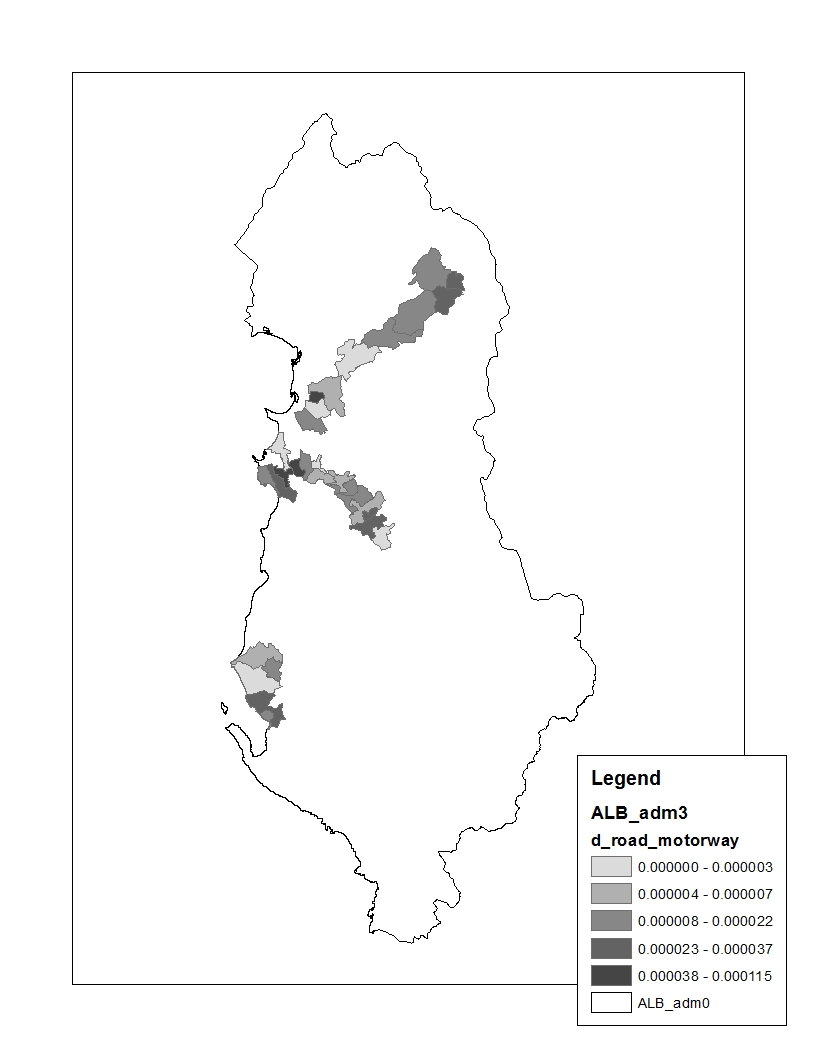

In [88]:
Image (path + "\\pics_Roads\\d_road_motorway.jpg")

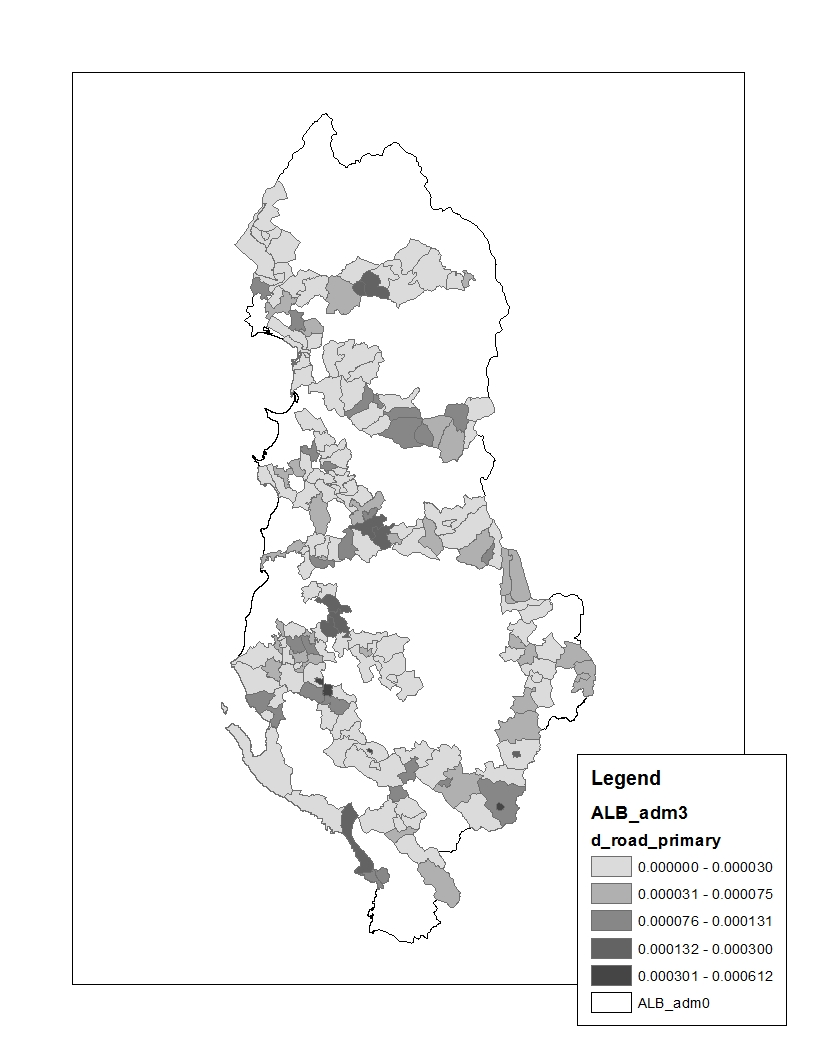

In [42]:
Image (path + "\\pics_Roads\\d_road_primary.jpg")

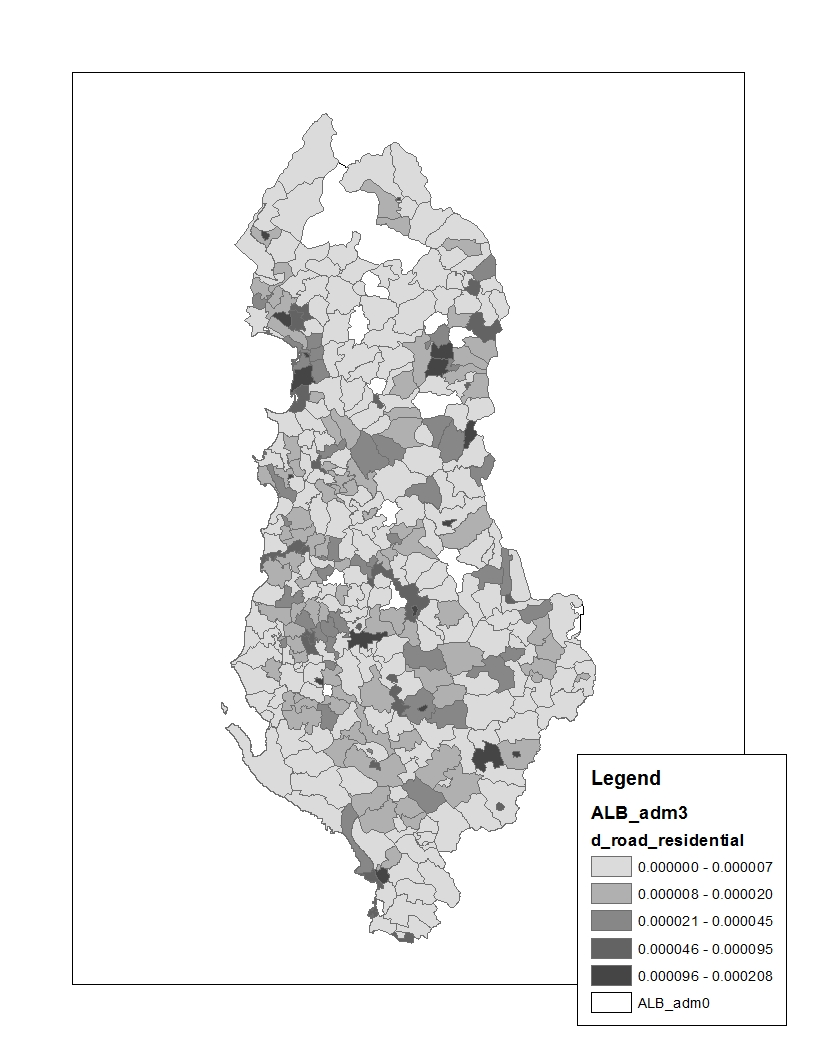

In [76]:
Image (path + "\\pics_Roads\\d_road_residential.jpg")

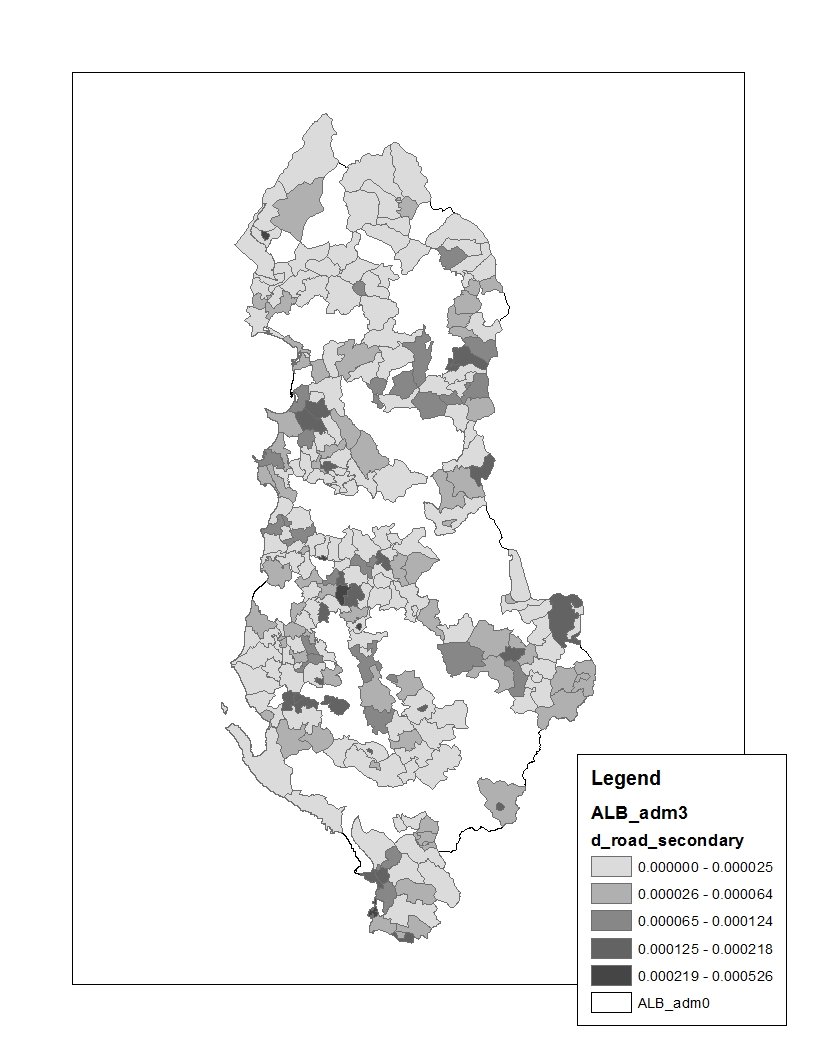

In [77]:
Image (path + "\\pics_Roads\\d_road_secondary.jpg")

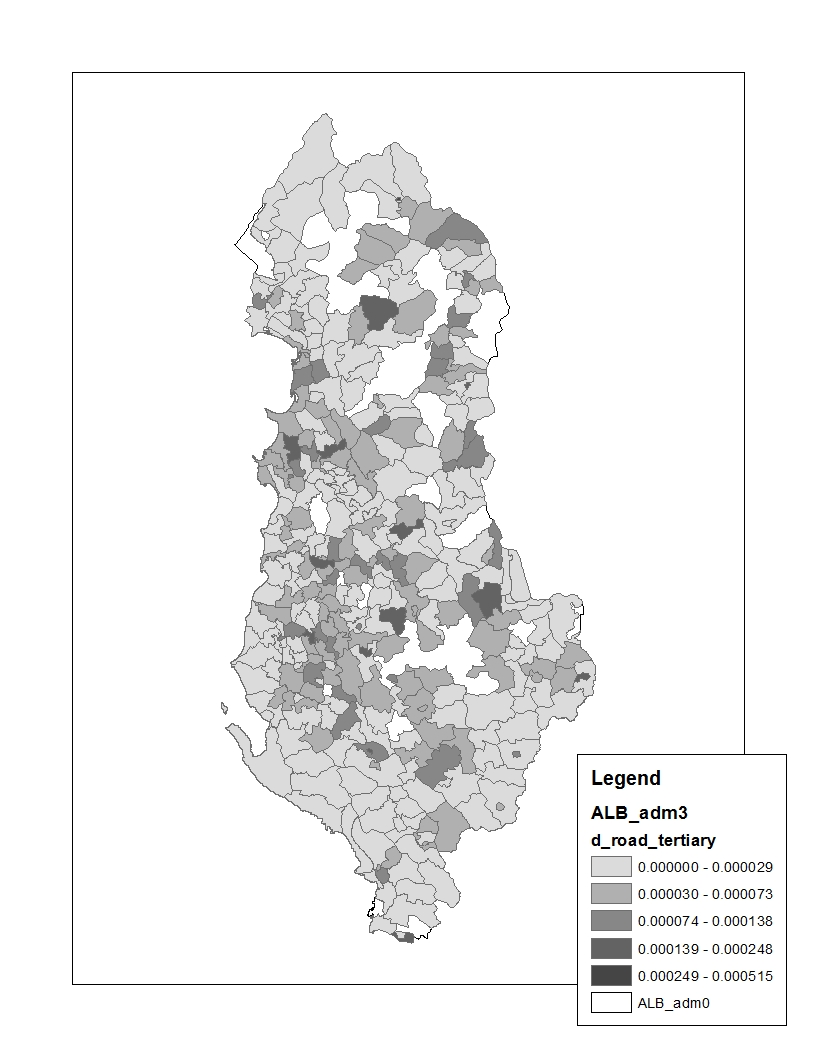

In [78]:
Image (path + "\\pics_Roads\\d_road_tertiary.jpg")

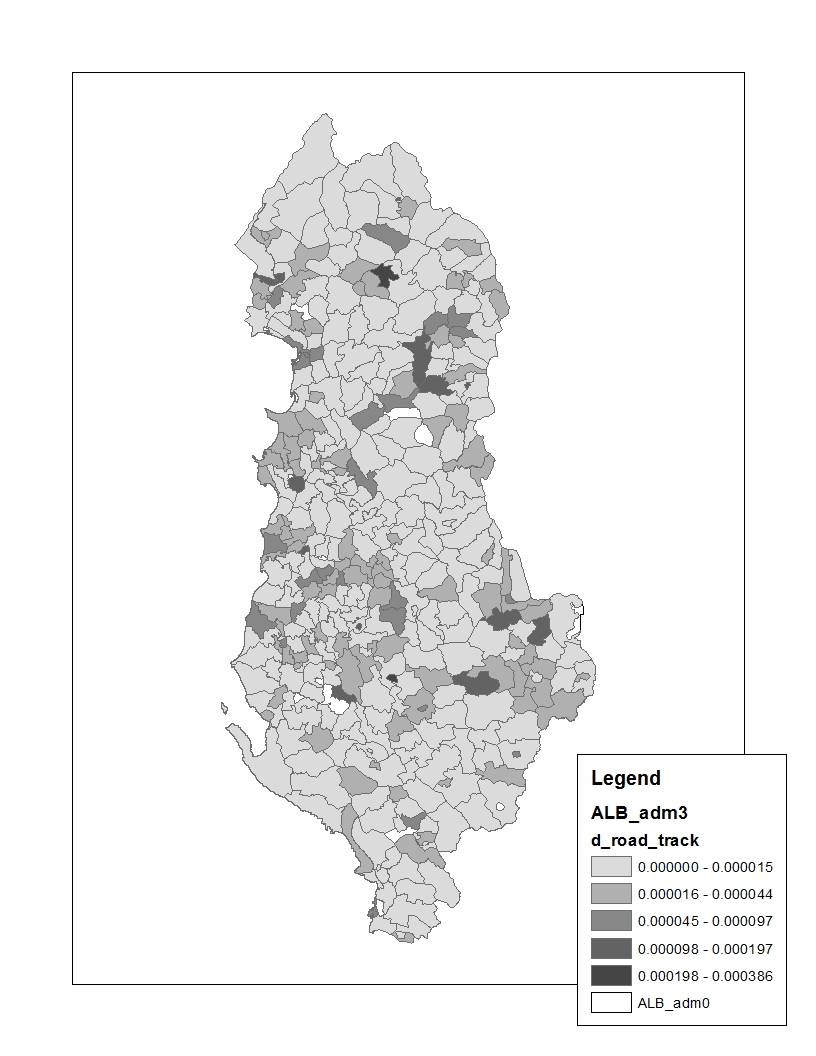

In [79]:
Image (path + "\\pics_Roads\\d_road_track.jpg")

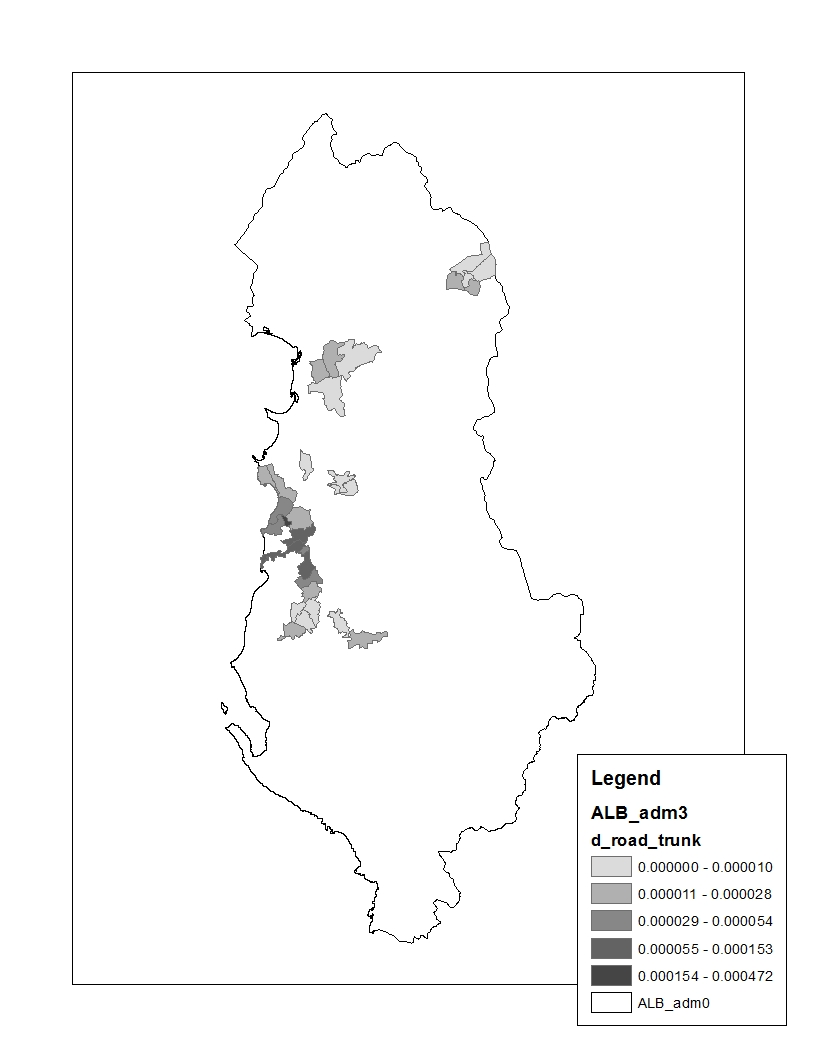

In [80]:
Image (path + "\\pics_Roads\\d_road_trunk.jpg")

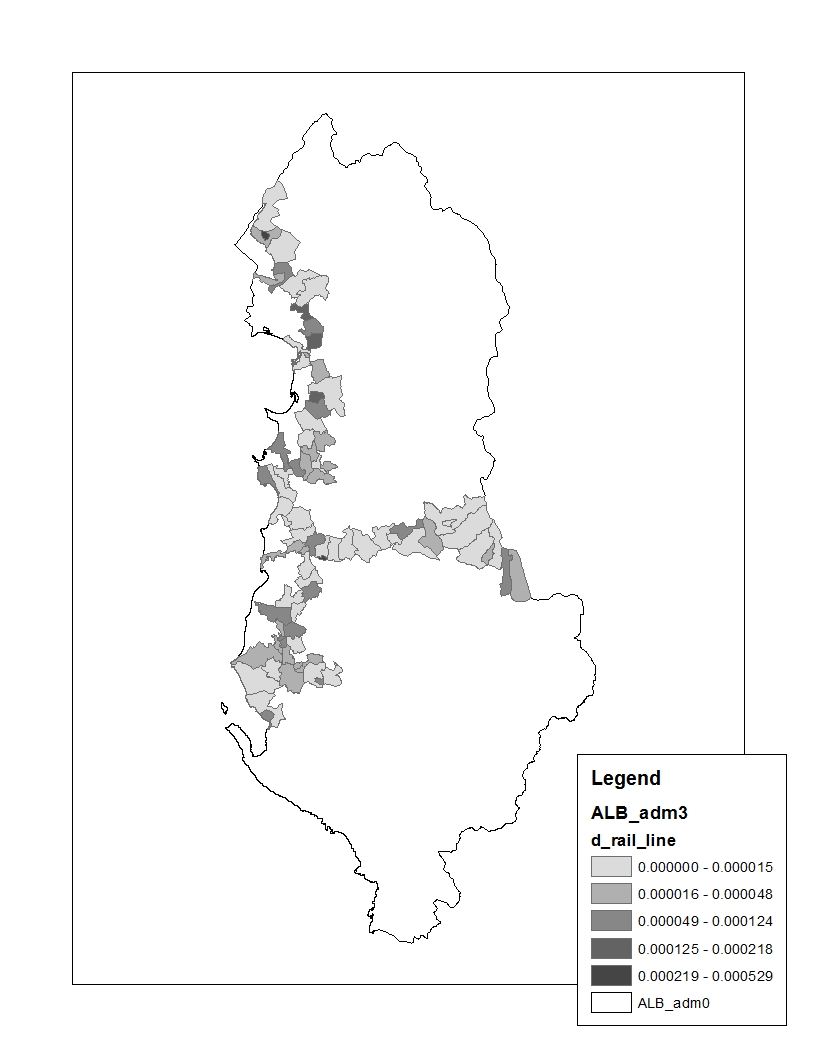

In [81]:
Image (path + "\\pics_Roads\\d_rail_line.jpg")

# Delete intermediary files from geodatabase (optional)

In [106]:
arcpy.env.workspace = path + "Roads.gdb"
resid=arcpy.ListFeatureClasses("*_intersect")
for i in resid:
    print i
    arcpy.Delete_management(i, "FeatureClass")
    print "Deleted {}".format(i)

road_motorway_intersect
Deleted road_motorway_intersect
road_primary_intersect
Deleted road_primary_intersect
road_residential_intersect
Deleted road_residential_intersect
road_secondary_intersect
Deleted road_secondary_intersect
road_tertiary_intersect
Deleted road_tertiary_intersect
road_track_intersect
Deleted road_track_intersect
road_trunk_intersect
Deleted road_trunk_intersect


# Exporting the attribute tables to a txt file

In [114]:
#1. Creating folder
Roads = path
dbf_Roads = Roads
# Process: Create Folder
arcpy.CreateFolder_management(Roads, "dbf_Roads")
print"Folder created"

Folder created


In [115]:
#2. Exporting the attribute table to a comma separated file
# Local variables:

# Local variables:
ALB_adm3 = path + "Roads.gdb\\ALB_adm3"
all_csv = ALB_adm3
dbf_Roads = path + "dbf_Roads"

# Process: Table to Table
arcpy.TableToTable_conversion(ALB_adm3, dbf_Roads, "all.txt", "", "ID_0 \"ID_0\" true true false 4 Long 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ID_0,-1,-1;ISO \"ISO\" true true false 3 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ISO,-1,-1;NAME_0 \"NAME_0\" true true false 75 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,NAME_0,-1,-1;ID_1 \"ID_1\" true true false 4 Long 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ID_1,-1,-1;NAME_1 \"NAME_1\" true true false 75 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,NAME_1,-1,-1;ID_2 \"ID_2\" true true false 4 Long 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ID_2,-1,-1;NAME_2 \"NAME_2\" true true false 75 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,NAME_2,-1,-1;ID_3 \"ID_3\" true true false 4 Long 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ID_3,-1,-1;NAME_3 \"NAME_3\" true true false 75 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,NAME_3,-1,-1;CCN_3 \"CCN_3\" true true false 4 Long 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,CCN_3,-1,-1;CCA_3 \"CCA_3\" true true false 15 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,CCA_3,-1,-1;TYPE_3 \"TYPE_3\" true true false 50 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,TYPE_3,-1,-1;ENGTYPE_3 \"ENGTYPE_3\" true true false 50 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ENGTYPE_3,-1,-1;NL_NAME_3 \"NL_NAME_3\" true true false 75 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,NL_NAME_3,-1,-1;VARNAME_3 \"VARNAME_3\" true true false 100 Text 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,VARNAME_3,-1,-1;Shape_Length \"Shape_Length\" false true true 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,Shape_Length,-1,-1;Shape_Area \"Shape_Area\" false true true 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,Shape_Area,-1,-1;ID \"ID\" true true false 4 Long 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,ID,-1,-1;road_motorway \"road_motorway\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_motorway,-1,-1;SArea \"SArea\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,SArea,-1,-1;d_road_motorway \"d_road_motorway\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_motorway,-1,-1;road_primary \"road_primary\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_primary,-1,-1;d_road_primary \"d_road_primary\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_primary,-1,-1;road_residential \"road_residential\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_residential,-1,-1;d_road_residenti \"d_road_residenti\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_residential,-1,-1;road_secondary \"road_secondary\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_secondary,-1,-1;d_road_secondary \"d_road_secondary\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_secondary,-1,-1;road_tertiary \"road_tertiary\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_tertiary,-1,-1;d_road_tertiary \"d_road_tertiary\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_tertiary,-1,-1;road_track \"road_track\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_track,-1,-1;d_road_track \"d_road_track\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_track,-1,-1;road_trunk \"road_trunk\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,road_trunk,-1,-1;d_road_trunk \"d_road_trunk\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_road_trunk,-1,-1;rail_line \"rail_line\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,rail_line,-1,-1;d_rail_line \"d_rail_line\" true true false 8 Double 0 0 ,First,#,path + Roads.gdb\\ALB_adm3,d_rail_line,-1,-1", "")
print "Exported txt file"

Exported txt file
